In [1]:
import json
import networkx as nx
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
correct_prompt_templates = [
    lambda n1, n2: f'How much is {n1} plus {n2}?',
    lambda n1, n2: f'What is {n1} plus {n2}?',
    lambda n1, n2: f'What is the result of {n1} plus {n2}?',
    lambda n1, n2: f'What is the sum of {n1} and {n2}?',
    lambda n1, n2: f'{n1} + {n2}=',
    lambda n1, n2: f'     {n1}     +     {n2}     =     ',
    lambda n1, n2: f'{n1}+{n2}=',
    lambda n1, n2: f'Combien font {n1} plus {n2}?',
]

In [3]:
def topk_edges(G, k):
    sorted_edges = sorted(G.edges(data=True), key=lambda e: abs(e[2].get('score')), reverse=True)
    return set((u, v) for u, v, attr in sorted_edges[:k])

def overlap_k(graphs, k):
    topk_sets = [topk_edges(G, k) for G in graphs]
    overlap_all = set.intersection(*topk_sets)
    return len(overlap_all), overlap_all

def create_graphs(checkpoint: str):
    def create_graph(file_path):
        with open(file_path) as f:
            data = json.load(f) 

        G = nx.DiGraph()   

        for node, attrs in data["nodes"].items():
            G.add_node(node, **attrs)  

        for edge_str, attrs in data["edges"].items():
            if "->" in edge_str:
                src, tgt = edge_str.split("->", 1)
                G.add_edge(src, tgt, weight=attrs.get('score', 0.0), **attrs)
            else:
                print(f"Warning: skipped malformed edge key: {edge_str}")
        return G

    G0 = create_graph(f"results/checkpoint-{checkpoint}/prompt_template_0/graph.json")
    G1 = create_graph(f"results/checkpoint-{checkpoint}/prompt_template_1/graph.json")
    G2 = create_graph(f"results/checkpoint-{checkpoint}/prompt_template_2/graph.json")
    G3 = create_graph(f"results/checkpoint-{checkpoint}/prompt_template_3/graph.json")
    G4 = create_graph(f"results/checkpoint-{checkpoint}/prompt_template_4/graph.json")
    G5 = create_graph(f"results/checkpoint-{checkpoint}/prompt_template_5/graph.json")
    G6 = create_graph(f"results/checkpoint-{checkpoint}/prompt_template_6/graph.json")
    G7 = create_graph(f"results/checkpoint-{checkpoint}/prompt_template_7/graph.json")
    G8 = create_graph(f"results/checkpoint-{checkpoint}/prompt_template_8/graph.json")

    graphs = [
    ('G0', G0),
    ('G1', G1),
    ('G2', G2),
    ('G3', G3),
    ('G4', G4),
    ('G5', G5),
    ('G6', G6),
    ('G7', G7),
    ('G8', G8),
    ]
    return graphs

def find_overlap(graphs, num_edges = 100):
    n = len(graphs)
    overlap_matrix = np.zeros((n, n))
    np.fill_diagonal(overlap_matrix, 1) 

    for (i, (name1, graph_1)), (j, (name2, graph_2)) in itertools.combinations(enumerate(graphs), 2):
        count, _ = overlap_k([graph_1, graph_2], k=num_edges)
        overlap_matrix[i, j] = count / num_edges
        overlap_matrix[j, i] = count / num_edges 

    overlap_matrix = overlap_matrix  
    return overlap_matrix

def plot_overlap(graphs, overlap_matrix):   

    plt.figure(figsize=(8, 6))
    sns.heatmap(overlap_matrix, xticklabels=[name for name, _ in graphs], 
                yticklabels=[name for name, _ in graphs], annot=True, fmt=".3f", cmap="Blues")
    plt.title("Pairwise Overlap_k Heatmap (k=100) [%]")
    plt.show()  

    for i,prompt in enumerate(correct_prompt_templates):
        print(f'G{i},{prompt(1,2)}')     

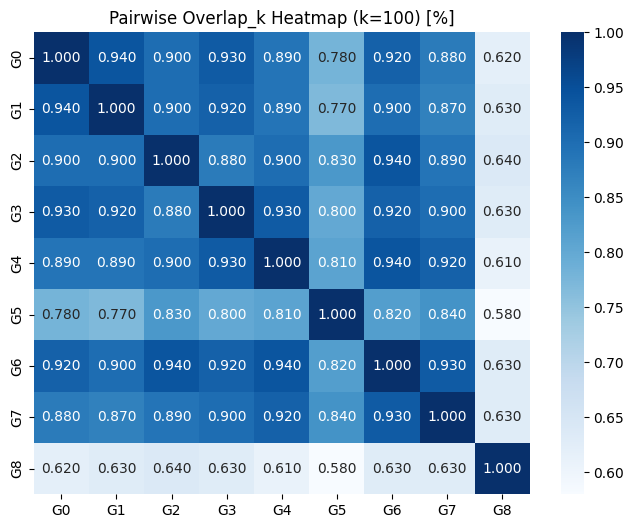

G0,How much is 1 plus 2?
G1,What is 1 plus 2?
G2,What is the result of 1 plus 2?
G3,What is the sum of 1 and 2?
G4,1 + 2=
G5,     1     +     2     =     
G6,1+2=
G7,Combien font 1 plus 2?


In [4]:
graphs = create_graphs('300')
overlap_matrix = find_overlap(graphs, 100)
plot_overlap(graphs, overlap_matrix)

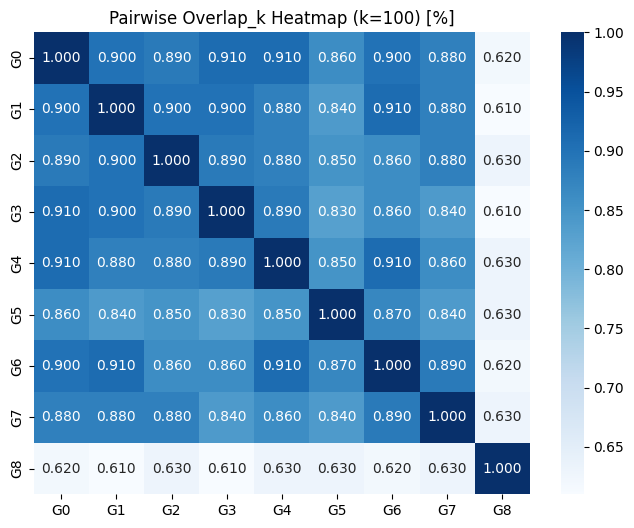

G0,How much is 1 plus 2?
G1,What is 1 plus 2?
G2,What is the result of 1 plus 2?
G3,What is the sum of 1 and 2?
G4,1 + 2=
G5,     1     +     2     =     
G6,1+2=
G7,Combien font 1 plus 2?


In [5]:
graphs = create_graphs('60')
overlap_matrix = find_overlap(graphs,100)
plot_overlap(graphs, overlap_matrix)

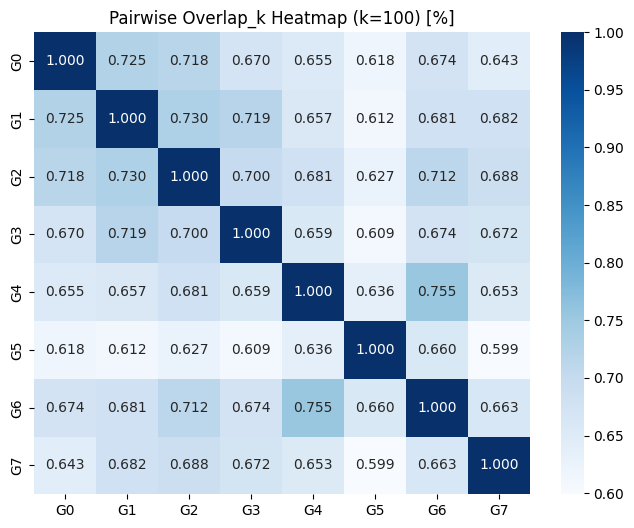

G0,How much is 1 plus 2?
G1,What is 1 plus 2?
G2,What is the result of 1 plus 2?
G3,What is the sum of 1 and 2?
G4,1 + 2=
G5,     1     +     2     =     
G6,1+2=
G7,Combien font 1 plus 2?


In [20]:
graphs = create_graphs('60')
overlap_matrix = find_overlap(graphs,1000)
plot_overlap(graphs, overlap_matrix)

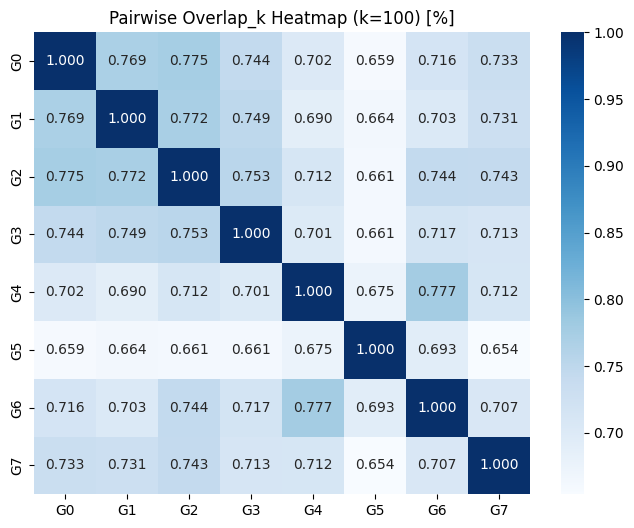

G0,How much is 1 plus 2?
G1,What is 1 plus 2?
G2,What is the result of 1 plus 2?
G3,What is the sum of 1 and 2?
G4,1 + 2=
G5,     1     +     2     =     
G6,1+2=
G7,Combien font 1 plus 2?


In [21]:
graphs = create_graphs('300')
overlap_matrix = find_overlap(graphs,1000)
plot_overlap(graphs, overlap_matrix)

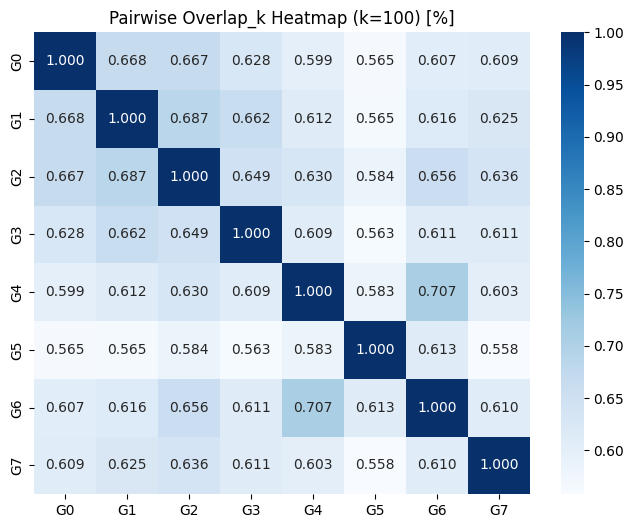

G0,How much is 1 plus 2?
G1,What is 1 plus 2?
G2,What is the result of 1 plus 2?
G3,What is the sum of 1 and 2?
G4,1 + 2=
G5,     1     +     2     =     
G6,1+2=
G7,Combien font 1 plus 2?


In [23]:
graphs = create_graphs('60')
overlap_matrix = find_overlap(graphs,2000)
plot_overlap(graphs, overlap_matrix)

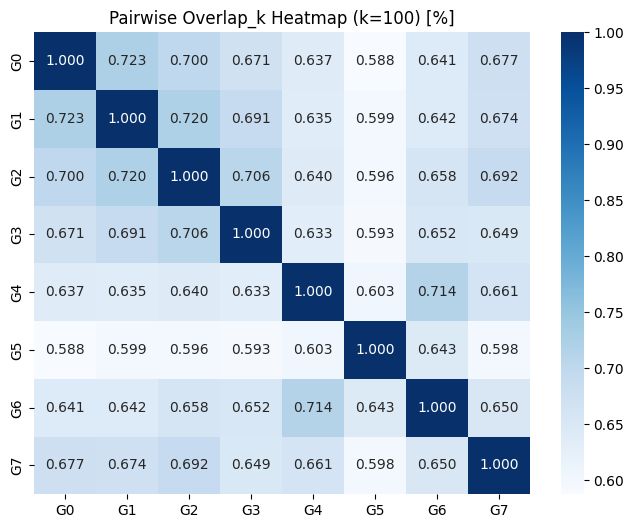

G0,How much is 1 plus 2?
G1,What is 1 plus 2?
G2,What is the result of 1 plus 2?
G3,What is the sum of 1 and 2?
G4,1 + 2=
G5,     1     +     2     =     
G6,1+2=
G7,Combien font 1 plus 2?


In [22]:
graphs = create_graphs('300')
overlap_matrix = find_overlap(graphs,2000)
plot_overlap(graphs, overlap_matrix)

#### Node overlap

In [8]:
graphs = create_graphs('300', 100)

TypeError: 'Graph' object is not subscriptable